# Imbalanced Learning

## Preprocessing

In [ ]:
color0 = '#FD4F0F'
color1 = '#15B985'
colordark0 = '#882501'
colordark1 = '#448D76'

colors =[color0,color1]
colorsdark = [colordark0 ,colordark1]

In [ ]:
#For binaryclass
X_train = df_train.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_train = df_train["vocal_channel"]
# y_train = y_train.ravel()

X_test = df_test.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_test = df_test["vocal_channel"]
# y_test = y_test.ravel()

lb = MyLabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.fit_transform(y_test)
n_classes = y_train_bin.shape[1]

print(X_train.shape)
print(y_train.shape)
print(y_train_bin)
print(y_train_bin.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test_bin)
print(y_test_bin.shape)

(1828, 425)
(1828,)
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
(1828, 2)
(624, 425)
(624,)
[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
(624, 2)


In [ ]:
y_train.value_counts()

speech    1080
song       748
Name: vocal_channel, dtype: int64

<AxesSubplot:ylabel='vocal_channel'>

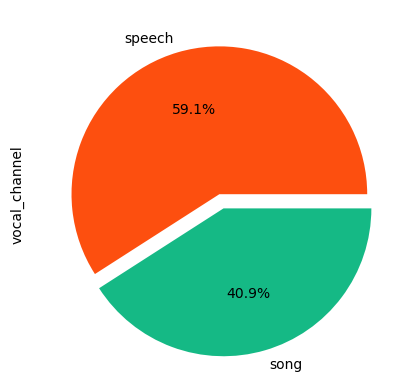

In [ ]:
y_train.value_counts().plot(kind = 'pie', colors = (color0, color1),explode= (0,0.1),autopct='%1.1f%%')

In [ ]:
(y_train == 'song').sum()

748

In [ ]:
size_class2 = (y_train == 'song').sum()
pct_class2 = (y_train == 'song').sum()/(y_train == 'speech').sum()
size_class2, pct_class2

(748, 0.6925925925925925)

In [ ]:
new_size_class2 = int(size_class2 * 0.04 / pct_class2)
new_size_class2

43

In [ ]:
y_test.value_counts()

speech    360
song      264
Name: vocal_channel, dtype: int64

<AxesSubplot:ylabel='vocal_channel'>

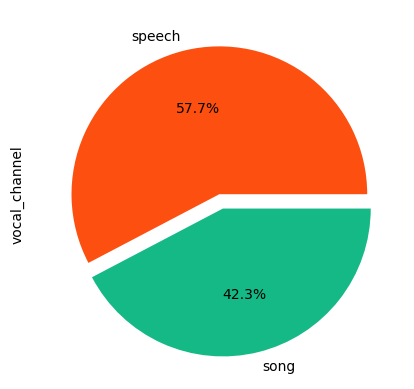

In [ ]:
y_test.value_counts().plot(kind = 'pie', colors = (color0, color1),explode= (0,0.1),autopct='%1.1f%%')

In [ ]:
(y_test == 'song').sum()

264

In [ ]:
test_size_class2 = (y_test == 'song').sum()
test_pct_class2 = (y_test == 'song').sum()/(y_test == 'speech').sum()
test_size_class2, test_pct_class2

(264, 0.7333333333333333)

In [ ]:
test_new_size_class2 = int(test_size_class2 * 0.04 / test_pct_class2)
test_new_size_class2

14

## Random Oversampling

In [ ]:
np.random.seed(18)
rows2remove = np.random.choice(df_train[df_train['vocal_channel'] == 'song'].index, size_class2 - (new_size_class2+2) , replace=False)
df_imb = df_train.drop(index=rows2remove, axis=0)

len(rows2remove), len(df_imb)

(703, 1125)

In [ ]:
print('Dataset shape %s' % Counter(df_imb['vocal_channel']))

Dataset shape Counter({'speech': 1080, 'song': 45})


<AxesSubplot:ylabel='vocal_channel'>

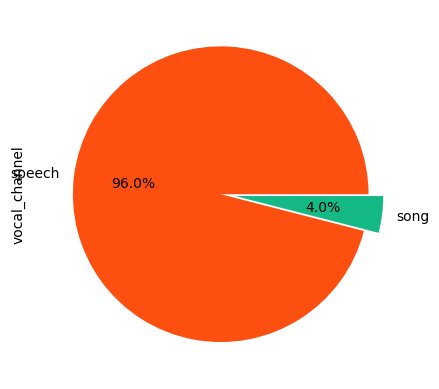

In [ ]:
df_imb['vocal_channel'].value_counts().plot(kind = 'pie', colors = (color0, color1),explode= (0,0.1),autopct='%1.1f%%')

In [ ]:
#For binaryclass
X_train = df_imb.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_train = df_imb["vocal_channel"]
# y_train = y_train.ravel()

X_test = df_test.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_test = df_test["vocal_channel"]
# y_test = y_test.ravel()

lb = MyLabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.fit_transform(y_test)
n_classes = y_train_bin.shape[1]

In [ ]:
y_test

0      speech
1      speech
2      speech
3      speech
4      speech
        ...  
619      song
620      song
621      song
622      song
623      song
Name: vocal_channel, Length: 624, dtype: object

In [ ]:
# define min max scaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
y_train_scale = scaler.fit_transform(y_train_bin)
X_test_scale = scaler.fit_transform(X_test)
y_test_scale = scaler.fit_transform(y_test_bin)

In [ ]:
y_test_scale

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train_scale, y_train_scale)

y_pred0 = clf.predict(X_test_scale)

print('Accuracy %s' % accuracy_score(y_test_scale, y_pred0))
print('F1-score %s' % f1_score(y_test_scale, y_pred0, average=None))
print(classification_report(y_test_scale, y_pred0))

Accuracy 0.8205128205128205
F1-score [0.86538462 0.73076923]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       360
           1       1.00      0.58      0.73       264

   micro avg       0.82      0.82      0.82       624
   macro avg       0.88      0.79      0.80       624
weighted avg       0.86      0.82      0.81       624
 samples avg       0.82      0.82      0.82       624



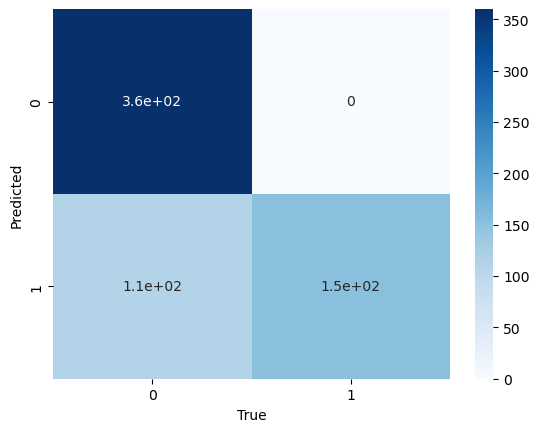

In [ ]:
cf = confusion_matrix(y_test_scale.argmax(axis=1), y_pred0.argmax(axis=1))
sns.heatmap(cf, annot=True, cmap="Blues")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'speech': 1080, 'song': 1080})


In [ ]:
y_train_bin = lb.fit_transform(y_res)

In [ ]:
X_train_scale = scaler.fit_transform(X_res)
y_train_scale = scaler.fit_transform(y_train_bin)
X_test_scale = scaler.fit_transform(X_test)
y_test_scale = scaler.fit_transform(y_test_bin)

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_train_scale, y_train_scale)

y_pred = clf.predict(X_test_scale)

print('Accuracy %s' % accuracy_score(y_test_scale, y_pred))
print('F1-score %s' % f1_score(y_test_scale, y_pred, average=None))
print(classification_report(y_test_scale, y_pred))

Accuracy 0.9423076923076923
F1-score [0.94842407 0.93454545]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       360
           1       0.90      0.97      0.93       264

   micro avg       0.94      0.94      0.94       624
   macro avg       0.94      0.95      0.94       624
weighted avg       0.95      0.94      0.94       624
 samples avg       0.94      0.94      0.94       624



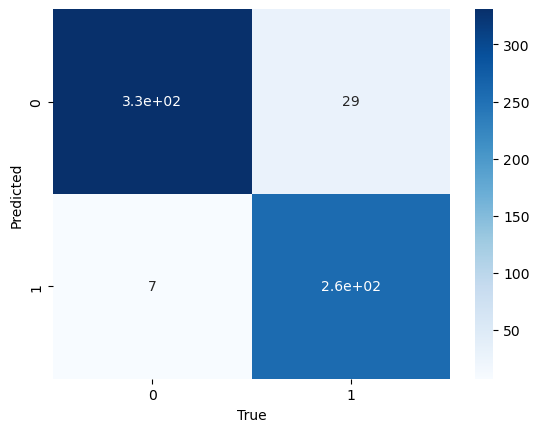

In [ ]:
cf = confusion_matrix(y_test_scale.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cf, annot=True, cmap="Blues")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'speech': 1080, 'song': 1080})


In [ ]:
y_train_bin = lb.fit_transform(y_res)

In [ ]:
X_train_scale = scaler.fit_transform(X_res)
y_train_scale = scaler.fit_transform(y_train_bin)
X_test_scale = scaler.fit_transform(X_test)
y_test_scale = scaler.fit_transform(y_test_bin)

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_train_scale, y_train_scale)

y_pred = clf.predict(X_test_scale)

print('Accuracy %s' % accuracy_score(y_test_scale, y_pred))
print('F1-score %s' % f1_score(y_test_scale, y_pred, average=None))
print(classification_report(y_test_scale, y_pred))

Accuracy 0.9407051282051282
F1-score [0.94691535 0.93284936]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       360
           1       0.90      0.97      0.93       264

   micro avg       0.94      0.94      0.94       624
   macro avg       0.94      0.95      0.94       624
weighted avg       0.94      0.94      0.94       624
 samples avg       0.94      0.94      0.94       624



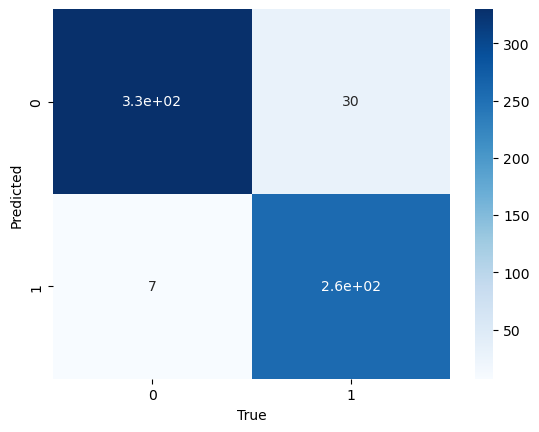

In [ ]:
cf = confusion_matrix(y_test_scale.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cf, annot=True, cmap="Blues")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
# Dopo l'oversampling
pca = PCA(n_components=2)
X_train_sm_pca = pca.fit_transform(X_train_scale)
print(X_train_sm_pca.shape)

(2160, 2)


In [ ]:
X_train_sm_pca.shape

(2160, 2)

In [ ]:
type(y_train_scale)

numpy.ndarray

In [ ]:
y_train_scale_colors = [i[0] for i in y_train_scale]

In [ ]:
y_train_scale_colors

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

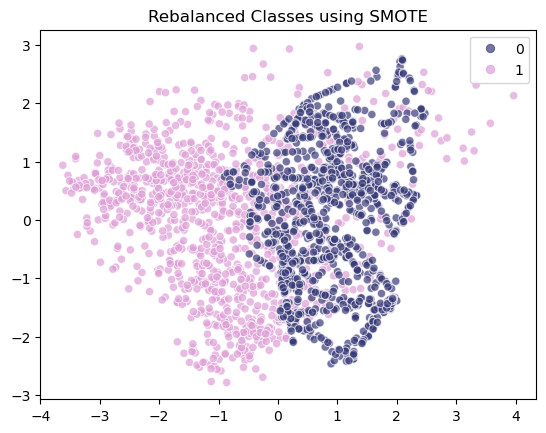

In [ ]:
classes = ['0', '1']
scatter = plt.scatter(X_train_sm_pca[:, 0], X_train_sm_pca[:, 1], c=y_train_scale_colors, cmap=plt.cm.tab20b, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("Rebalanced Classes using SMOTE")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

## Random Undersampling

In [ ]:
data_imb_under = df_train.copy()
# data_imb_under['vocal_channel'] = y_label[0].values

print("Records before imbalancing class 3: ", len(data_imb_under))
print(data_imb_under['vocal_channel'].value_counts())

Records before imbalancing class 3:  1828
speech    1080
song       748
Name: vocal_channel, dtype: int64


In [ ]:
# Copiamo e incolliamo la classe 2 per sbilanciarla
data_imb_under2 = data_imb_under[data_imb_under['vocal_channel']=='speech']
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)

print("\nRecords after imbalancing class 3: ", len(data_imb_under))
print(data_imb_under['vocal_channel'].value_counts(), "\n")

# X_train_imb_under = data_imb_under.iloc[:, 0:561].values
# y_train_imb_under = data_imb_under['vocal_channel'].values

# # X_train_imb, X_val_imb, y_train_imb, y_val_imb = train_test_split(data_imb1, y_label_imb, test_size=0.30, random_state= 8)

# print(X_train_imb_under.shape)
# print(y_train_imb_under.shape)


Records after imbalancing class 3:  9388
speech    8640
song       748
Name: vocal_channel, dtype: int64 



In [ ]:
#For binaryclass
X_train = data_imb_under.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_train = data_imb_under["vocal_channel"]
# y_train = y_train.ravel()

X_test = df_test.drop(["modality", "vocal_channel", "emotion", "actor", "emotional_intensity", "statement", "repetition", "sex", "filename"], axis='columns')
y_test = df_test["vocal_channel"]
# y_test = y_test.ravel()

lb = MyLabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.fit_transform(y_test)
n_classes = y_train_bin.shape[1]

In [ ]:
# define min max scaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
y_train_scale = scaler.fit_transform(y_train_bin)
X_test_scale = scaler.fit_transform(X_test)
y_test_scale = scaler.fit_transform(y_test_bin)

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train_scale, y_train_scale)

y_pred0 = clf.predict(X_test_scale)

print('Accuracy %s' % accuracy_score(y_test_scale, y_pred0))
print('F1-score %s' % f1_score(y_test_scale, y_pred0, average=None))
print(classification_report(y_test_scale, y_pred0))

Accuracy 0.9455128205128205
F1-score [0.9532967  0.93461538]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       360
           1       0.95      0.92      0.93       264

   micro avg       0.95      0.95      0.95       624
   macro avg       0.95      0.94      0.94       624
weighted avg       0.95      0.95      0.95       624
 samples avg       0.95      0.95      0.95       624



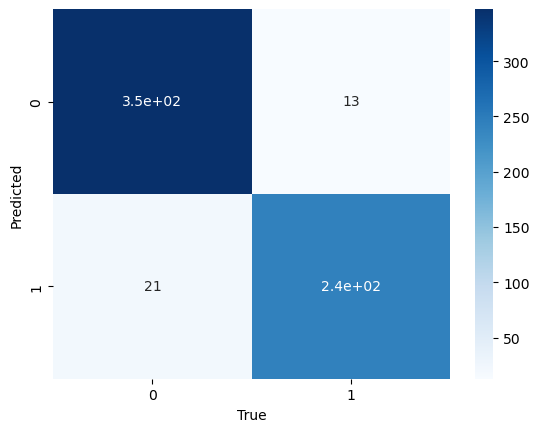

In [ ]:
cf = confusion_matrix(y_test_scale.argmax(axis=1), y_pred0.argmax(axis=1))
sns.heatmap(cf, annot=True, cmap="Blues")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
rus = RandomUnderSampler(random_state=42)

In [ ]:
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'song': 748, 'speech': 748})


In [ ]:
y_train_bin = lb.fit_transform(y_res)
X_train_scale = scaler.fit_transform(X_res)
y_train_scale = scaler.fit_transform(y_train_bin)
X_test_scale = scaler.fit_transform(X_test)
y_test_scale = scaler.fit_transform(y_test_bin)

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_train_scale, y_train_scale)

y_pred = clf.predict(X_test_scale)

print('Accuracy %s' % accuracy_score(y_test_scale, y_pred))
print('F1-score %s' % f1_score(y_test_scale, y_pred, average=None))
print(classification_report(y_test_scale, y_pred))

Accuracy 0.9358974358974359
F1-score [0.94219653 0.92805755]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       360
           1       0.88      0.98      0.93       264

   micro avg       0.94      0.94      0.94       624
   macro avg       0.93      0.94      0.94       624
weighted avg       0.94      0.94      0.94       624
 samples avg       0.94      0.94      0.94       624



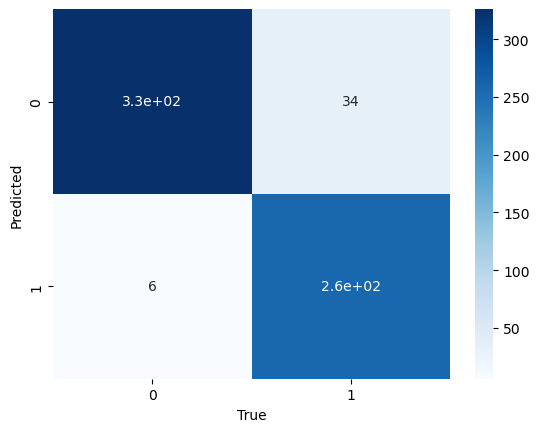

In [ ]:
cf = confusion_matrix(y_test_scale.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cf, annot=True, cmap="Blues")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'song': 748, 'speech': 335})


In [ ]:
y_train_bin = lb.fit_transform(y_res)
X_train_scale = scaler.fit_transform(X_res)
y_train_scale = scaler.fit_transform(y_train_bin)
X_test_scale = scaler.fit_transform(X_test)
y_test_scale = scaler.fit_transform(y_test_bin)

In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_train_scale, y_train_scale)

y_pred = clf.predict(X_test_scale)

print('Accuracy %s' % accuracy_score(y_test_scale, y_pred))
print('F1-score %s' % f1_score(y_test_scale, y_pred, average=None))
print(classification_report(y_test_scale, y_pred))

Accuracy 0.9006410256410257
F1-score [0.90662651 0.89383562]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       360
           1       0.82      0.99      0.89       264

   micro avg       0.90      0.90      0.90       624
   macro avg       0.90      0.91      0.90       624
weighted avg       0.92      0.90      0.90       624
 samples avg       0.90      0.90      0.90       624



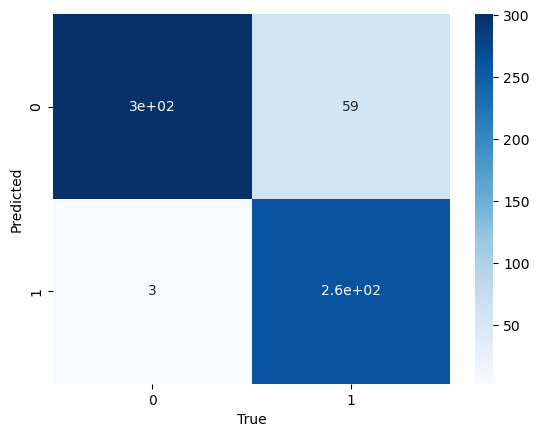

In [ ]:
cf = confusion_matrix(y_test_scale.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cf, annot=True, cmap="Blues")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()